In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

import scikitplot as skplt
from sklearn.pipeline import Pipeline


In [8]:
df = pd.read_csv('D:/桌面/male_below_age.csv')

In [9]:
# define our features 
X = df.drop(["HeartDisease"], axis=1)
# define our target
y = df[["HeartDisease"]]
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
3,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
4,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0


In [10]:
#Categorical Encoding 
#OneHotEncoder() to encode the categorical columns: 'ChestPainType', 'RestingECG', 'ST_Slope'
X_encoded = pd.get_dummies(X, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])
X_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,N,0.0,False,True,False,False,False,True,False,False,False,True
1,37,M,130,283,0,98,N,0.0,False,True,False,False,False,False,True,False,False,True
2,39,M,120,339,0,170,N,0.0,False,False,True,False,False,True,False,False,False,True
3,37,M,140,207,0,130,Y,1.5,True,False,False,False,False,True,False,False,True,False
4,39,M,120,204,0,145,N,0.0,False,True,False,False,False,True,False,False,False,True


In [11]:
# Identify the columns that are one-hot encoded
one_hot_columns = ['ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 
                    'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 
                    'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

# Convert only the one-hot encoded columns to int
X_encoded[one_hot_columns] = X_encoded[one_hot_columns].astype(int)
X_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,140,289,0,172,N,0.0,0,1,0,0,0,1,0,0,0,1
1,37,M,130,283,0,98,N,0.0,0,1,0,0,0,0,1,0,0,1
2,39,M,120,339,0,170,N,0.0,0,0,1,0,0,1,0,0,0,1
3,37,M,140,207,0,130,Y,1.5,1,0,0,0,0,1,0,0,1,0
4,39,M,120,204,0,145,N,0.0,0,1,0,0,0,1,0,0,0,1


In [13]:
#LabelEncoder() to encode binary columns: 'Sex', 'ExerciseAngina'from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

columns = ['Sex', 'ExerciseAngina']

for column in columns:
    le = LabelEncoder()
    le.fit(X_encoded[column])
    X_encoded[column] = le.transform(X_encoded[column])

X_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,37,0,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
2,39,0,120,339,0,170,0,0.0,0,0,1,0,0,1,0,0,0,1
3,37,0,140,207,0,130,1,1.5,1,0,0,0,0,1,0,0,1,0
4,39,0,120,204,0,145,0,0.0,0,1,0,0,0,1,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size= 0.2, random_state= 0)

In [15]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, RocCurveDisplay, auc, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import cross_val_score

In [16]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, max_features='sqrt', random_state=0) 
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
roc_auc_score(y_test, y_pred)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8531746031746031

In [17]:
print('confusion matrix = \n', confusion_matrix(y_test, y_pred, labels=[1, 0]))
print('accuracy = ', accuracy_score(y_test, y_pred))
print('precision = ', precision_score(y_test, y_pred))
print('recall = ', recall_score(y_test, y_pred))
print('f1 score = ', f1_score(y_test, y_pred))

confusion matrix = 
 [[26  2]
 [ 8 28]]
accuracy =  0.84375
precision =  0.7647058823529411
recall =  0.9285714285714286
f1 score =  0.8387096774193549


In [18]:
import shap  

explainer = shap.TreeExplainer(rfc)

shap_values = explainer.shap_values(X_test)

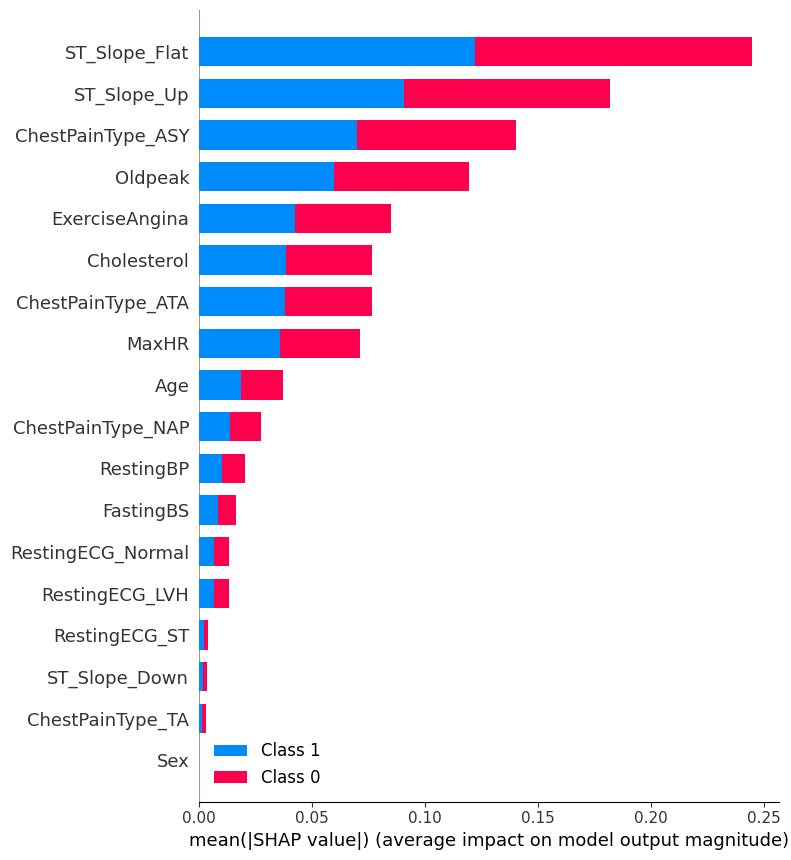

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

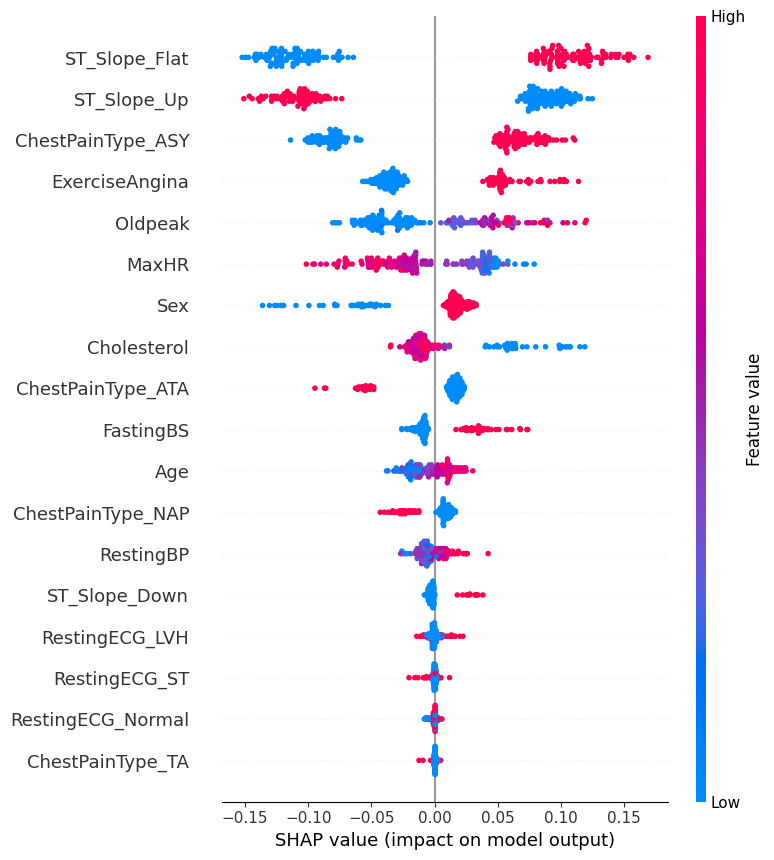

In [26]:
shap.summary_plot(shap_values[1], X_test)